In [1]:
import sys
import os
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from data_manager import *
from metadata import *
from preprocess_utilities import *
from data_manager import DataManager
from annotation_utilities import *

/home/alexn/brainDev/src/utilities/utilities2015.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-pac

Setting environment for Precision WorkStation for Alex Newberry
{'TEST001': 0.46, 'MD585': 0.46, 'MD594': 0.46, 'MD589': 0.46, 'UCSD001': 0.325, 'DK17': 0.325}
Loaded data from saved metadata_cache for MD585
Loaded data from saved metadata_cache for MD589
Loaded data from saved metadata_cache for MD594
Loaded data from saved metadata_cache for UCSD001


Folder for stack MD590 not found, skipping.
Folder for stack MD591 not found, skipping.
Folder for stack MD592 not found, skipping.
Folder for stack MD593 not found, skipping.
Folder for stack MD595 not found, skipping.
Folder for stack MD598 not found, skipping.
Folder for stack MD599 not found, skipping.
Folder for stack MD602 not found, skipping.
Folder for stack MD603 not found, skipping.
Folder for stack MD635 not found, skipping.
Folder for stack MD653 not found, skipping.
Folder for stack MD652 not found, skipping.
Folder for stack MD642 not found, skipping.
Folder for stack MD657 not found, skipping.
Folder for stack MD658 not found, skipping.
Folder for stack MD661 not found, skipping.
Folder for stack MD662 not found, skipping.
Folder for stack CHATM2 not found, skipping.
Folder for stack CHATM3 not found, skipping.


In [38]:
def shift_and_save_annotations(stack, hand_annotations_prep2, fn, prep=2, corr=1):
    hdf_root = os.path.join(ROOT_DIR,'CSHL_labelings_v3',stack+'/')
    new_fn = fn[:fn.index('.hdf')]
    
    for i in range(num_annotations):
        if prep==2:
            if corr==1: # For MDs on Atlas computer
                offsets = {'MD585':[952,-448],'MD589':[-1570,-350],'MD594':[-2225,-400]}
            elif corr==2: # For MD585 on S3
                offsets = {'MD585':[-950,400]}
            vertices = hand_annotations_prep2['vertices'][i]
            label_position = hand_annotations_prep2['label_position'][i]
            hand_annotations_prep2['vertices'][i] = vertices + offsets[stack]
            hand_annotations_prep2['label_position'][i] = label_position + offsets[stack]
    new_fn = hdf_root+new_fn+'_prep2_corr'+str(corr)+'.hdf'
    
    save_hdf_v2(hand_annotations_prep2, new_fn)
    
def get_new_annotation_fp(stack, hand_annotations_prep2, fn, prep=2, corr=1):
    hdf_root = os.path.join(ROOT_DIR,'CSHL_labelings_v3',stack+'/')
    new_fn = fn[:fn.index('.hdf')]
    
    new_fn = hdf_root+new_fn+'_prep2_corr'+str(corr)+'.hdf'
    
    return new_fn

In [3]:
stack = "MD585"

hdf_root = ROOT_DIR+'/CSHL_labelings_v3/'+stack+'/'
if stack=="MD585":
    fn = 'MD585_annotation_contours_05312018041032.hdf'
if stack=="MD589":
    fn = 'MD589_annotation_contours_05312018031718.hdf'
if stack=="MD594":
    fn = 'MD594_annotation_contours_05312018035134.hdf'
hand_annotations = load_hdf_v2(hdf_root+fn)

num_annotations = len(hand_annotations)
    
hand_annotations_prep2 = convert_annotation_v3_original_to_aligned_cropped_v2(\
                                        hand_annotations, stack=stack,\
                                        out_resolution='raw', prep_id=2)

hand_annotations_prep5 = convert_annotation_v3_original_to_aligned_cropped_v2(\
                                        hand_annotations, stack=stack,\
                                        out_resolution='raw', prep_id=5)

Seems you are using operation INIs to provide cropbox.
Seems you are using operation INIs to provide cropbox.


In [10]:
# Load previously created file:
ann_p2_fp = get_new_annotation_fp(stack, hand_annotations_prep2, fn, prep=2)
annotation_updated = load_hdf_v2( ann_p2_fp )

# Actually create new annotation file:
# shift_and_save_annotations(stack, hand_annotations_prep2, fn, prep=2)

In [41]:
get_new_annotation_fp(stack, hand_annotations_prep2, fn, prep=2)


'/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_labelings_v3/MD585/MD585_annotation_contours_05312018041032_prep2_corr1.hdf'

In [39]:
shift_and_save_annotations(stack, hand_annotations_prep2, fn, prep=2, corr=2)

/usr/local/lib/python2.7/dist-packages/pandas/core/generic.py:939: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->['class', 'creator', 'edits', 'filename', 'id', 'label_position', 'name', 'orientation', 'parent_structure', 'resolution', 'section', 'side', 'side_manually_assigned', 'time_created', 'type', 'vertices']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [22]:
annotation_updated

,class,creator,edits,filename,id,label_position,name,orientation,parent_structure,resolution,section,side,side_manually_assigned,time_created,type,vertices
100157269992733,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205,100157269992733,"[7276.284859855292, 7546.993140571727]",VCA,sagittal,[],raw,367,R,False,09152016033619,confirmed,"[[7476.17555322816, 7984.977043818117], [7316...."
100472025966132,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD589-N51-2015.07.30-19.28.17_MD589_2_0152,100472025966132,"[10644.460680035572, 10933.363273374733]",IO,sagittal,[],raw,260,R,False,09122016211223,confirmed,"[[10135.947729853007, 10933.270657973084], [99..."
10063296125941,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD589-N55-2015.07.30-19.49.42_MD589_3_0165,10063296125941,"[11608.415904106292, 10622.075455632674]",LRt,sagittal,[],raw,286,R,False,09152016024654,confirmed,"[[11989.668055220041, 11086.806412829588], [11..."
101105413939417,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD589-N54-2015.07.30-19.44.32_MD589_1_0160,101105413939417,"[11080.859853501861, 10385.125821328125]",LRt,sagittal,[],raw,276,R,False,09152016024654,confirmed,"[[11805.602660507782, 10950.894932558649], [11..."
101214741356495,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'053...",MD589-N37-2015.07.30-18.32.51_MD589_1_0109,101214741356495,"[5328.361431529123, 1855.4492753623208]",SC,sagittal,[],raw,202,S,False,05312018021355,intersected,"[[4068.2608695651943, 3084.434782608698], [398..."
101230503010020,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD589-N57-2015.07.30-19.59.14_MD589_3_0171,101230503010020,"[8017.387824696831, 10043.16140326181]",7N,sagittal,[],raw,298,R,False,09152016032103,confirmed,"[[8381.395264605912, 10520.541926469015], [822..."
101241519914894,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196,101241519914894,"[7263.202924949412, 6977.079367054303]",VCA,sagittal,[],raw,349,R,False,09152016033619,confirmed,"[[7827.8946085194, 7400.807799382057], [7667.8..."
101265872398769,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'053...",MD589-N60-2015.07.30-20.11.20_MD589_2_0179,101265872398769,"[12178.894709271866, 8530.427448926137]",Sp5C,sagittal,[],raw,314,R,False,05312018031644,intersected,"[[12450.869565217392, 9780.086956521736], [123..."
101313395614874,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175,101313395614874,"[8190.1558348411345, 7210.045294377269]",8n,sagittal,[],raw,307,R,False,09152016032626,confirmed,"[[8339.944573289127, 7504.561515360765], [8179..."
101316808387285,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'053...",MD589-N31-2015.07.30-18.08.35_MD589_1_0091,101316808387285,"[5272.443588332426, 2149.927352779303]",SC,sagittal,[],raw,178,S,False,05312018021354,intersected,"[[4068.260869565227, 3606.173913043478], [3981..."


In [11]:
annotation_updated.keys()

Index([u'class', u'creator', u'edits', u'filename', u'id', u'label_position',
       u'name', u'orientation', u'parent_structure', u'resolution', u'section',
       u'side', u'side_manually_assigned', u'time_created', u'type',
       u'vertices'],
      dtype='object')

In [8]:
section = 295
prep = 5

imgtype = 'raw'

fn = metadata_cache['sections_to_filenames'][stack][section]
print fn

img_fp = os.environ['ROOT_DIR']+'CSHL_data_processed/'+stack+'/'+stack+'_prep'+str(prep)+'_'+imgtype+'_gray/'+fn+'_prep'+str(prep)+'_'+imgtype+'_gray.tif'
img = imread(img_fp)

MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169


IOError: [Errno 2] No such file or directory: u'/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep5_raw_gray/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169_prep5_raw_gray.tif'

In [25]:
print stack
print ''

rostral_lim, caudal_lim, dorsal_lim, ventral_lim = DataManager.load_cropbox_v2(stack, prep_id=2, only_2d=True)
print 'PREP 2'
print [rostral_lim, caudal_lim, dorsal_lim, ventral_lim]
print 'width', caudal_lim-rostral_lim
print 'height', ventral_lim-dorsal_lim
print 'width', (caudal_lim-rostral_lim)*32
print 'height', (ventral_lim-dorsal_lim)*32
print ''

rostral_lim, caudal_lim, dorsal_lim, ventral_lim = DataManager.load_cropbox_v2(stack, prep_id=5, only_2d=True)
print 'PREP 5'
print [rostral_lim, caudal_lim, dorsal_lim, ventral_lim]
print 'width', caudal_lim-rostral_lim
print 'height', ventral_lim-dorsal_lim
print 'width', (caudal_lim-rostral_lim)*32
print 'height', (ventral_lim-dorsal_lim)*32

MD585

PREP 2
[521, 1057, 128, 465]
width 536
height 337
width 17152
height 10784

PREP 5
[50, 1188, 21, 738]
width 1138
height 717
width 36416
height 22944


Seems you are using operation INIs to provide cropbox.
Seems you are using operation INIs to provide cropbox.


In [10]:
np.shape(img)

(22976, 36448)

In [13]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
img = Image.open( '/home/alexn/Downloads/MD585-IHC47-2015.08.19-14.53.04_MD585_3_0141_prep2_lossless_gray.tif' )

In [14]:
prep = 2

In [23]:
section = metadata_cache['filenames_to_sections'][stack]['MD585-IHC47-2015.08.19-14.53.04_MD585_3_0141']

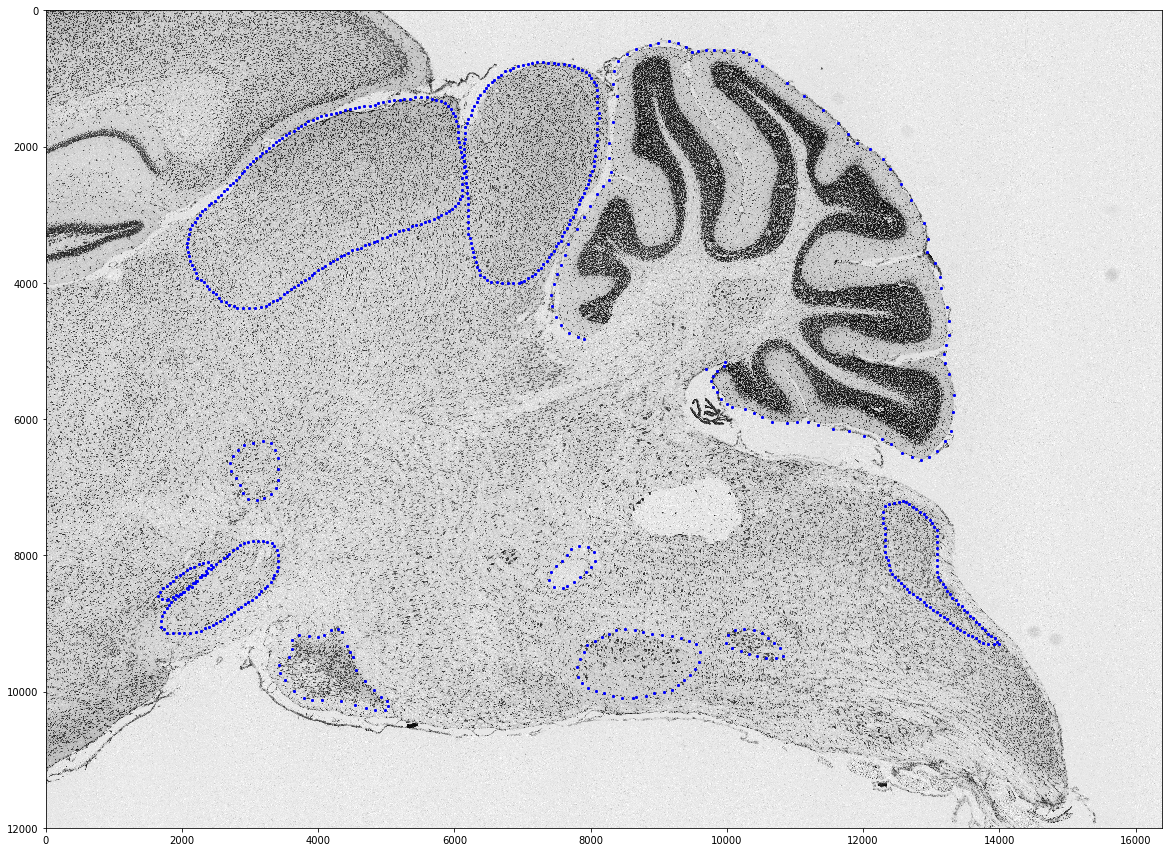

In [36]:
plt.figure(figsize=(20, 20))
plt.imshow(np.asarray(img), cmap='gray')

# Prep 2
offsets = {'MD585':[952,-448],'MD589':[-1570,-350],'MD594':[-2225,-400]}
offsets = {'MD585':[-950,400]}

# Prep 5
#prep5_to_prep2_offsets = {'MD585':[15072,3424],'MD589':[-0,-0],'MD594':[-0,-0]}
if prep==5:
    offsets = {'MD585':[0,0],'MD589':[0,0],'MD594':[0,0]}

# for structure in ['7n','IC','SNC','SNR']:
for structure in structures_unsided_sorted_by_rostral_caudal_position:
    x_offset = offsets[stack][0]
    y_offset = offsets[stack][1]
    x_raw = []
    y_raw = []
    x_thumb = []
    y_thumb = []
    
    try:
        for i in range(num_annotations):
            if prep==2:
                curr_section = hand_annotations_prep2['section'][i]
                if curr_section != section:
                    continue
                structure = hand_annotations_prep2['name'][i]
                side = hand_annotations_prep2['side'][i]
                vertices = hand_annotations_prep2['vertices'][i]
            elif prep==5:
                curr_section = hand_annotations_prep5['section'][i]
                if curr_section != section:
                    continue
                structure = hand_annotations_prep5['name'][i]
                side = hand_annotations_prep5['side'][i]
                vertices = hand_annotations_prep5['vertices'][i]
            
            for x, y in vertices:
                x_raw.append( int(round(float(x))+x_offset) )
                y_raw.append( int(round(float(y))+y_offset) )
                x_thumb.append( (float(x)/32)+x_offset/32 )
                y_thumb.append( (float(y)/32)+y_offset/32 )
    except Exception as e:
#         print structure+' skipped'
#         print e
        continue

    plt.scatter(x_raw, y_raw, s=1, c='blue', alpha=.5)

In [11]:
plt.figure(figsize=(20, 20))
plt.imshow(img, cmap='gray')

# Prep 2
offsets = {'MD585':[952,-448],'MD589':[-1570,-350],'MD594':[-2225,-400]}
# Prep 5
#prep5_to_prep2_offsets = {'MD585':[15072,3424],'MD589':[-0,-0],'MD594':[-0,-0]}
if prep==5:
    offsets = {'MD585':[0,0],'MD589':[0,0],'MD594':[0,0]}

# for structure in ['7n','IC','SNC','SNR']:
for structure in structures_unsided_sorted_by_rostral_caudal_position:
    x_offset = offsets[stack][0]
    y_offset = offsets[stack][1]
    x_raw = []
    y_raw = []
    x_thumb = []
    y_thumb = []
    
    try:
        for i in range(num_annotations):
            if prep==2:
                curr_section = hand_annotations_prep2['section'][i]
                if curr_section != section:
                    continue
                structure = hand_annotations_prep2['name'][i]
                side = hand_annotations_prep2['side'][i]
                vertices = hand_annotations_prep2['vertices'][i]
            elif prep==5:
                curr_section = hand_annotations_prep5['section'][i]
                if curr_section != section:
                    continue
                structure = hand_annotations_prep5['name'][i]
                side = hand_annotations_prep5['side'][i]
                vertices = hand_annotations_prep5['vertices'][i]
            
            for x, y in vertices:
                x_raw.append( int(round(float(x))+x_offset) )
                y_raw.append( int(round(float(y))+y_offset) )
                x_thumb.append( (float(x)/32)+x_offset/32 )
                y_thumb.append( (float(y)/32)+y_offset/32 )
    except Exception as e:
#         print structure+' skipped'
#         print e
        continue

    plt.scatter(x_raw, y_raw, s=1, c='blue', alpha=.5)

AttributeError: 'numpy.ndarray' object has no attribute 'mask'

In [21]:
# Prep5 -> Prep2 real offset
# MD585
# prep2_thumb_real = [338, 537]  # The actual prep2 image files are this big
# prep2_thumb_cropbox_dimensions = [337, 536]  # Size in the metadata cropbox
# [15072.  3424.]
# [471. 107.]

# MD589
# prep2_thumb_real = [373, 485]
# prep2_thumb_cropbox_dimensions = [368, 484] 
# [16672.  4128.]
# [521. 129.]

# MD594
# prep2_thumb_real = [347, 538]
# prep2_thumb_cropbox_dimensions =  [348, 438]
# [17568.  2464.]
# [549.  77.]

print (hand_annotations_prep5['vertices'][0]-hand_annotations_prep2['vertices'][0])[0]
print (hand_annotations_prep5['vertices'][0]-hand_annotations_prep2['vertices'][0])[0]/32

[16672.  4128.]
[521. 129.]


In [17]:
stack

'MD594'

In [126]:
prep_id=2

xmin_down32, _, ymin_down32, _ = DataManager.load_cropbox_v2(stack, prep_id=prep_id, only_2d=True)
Ts_rawResol = DataManager.load_transforms(stack=stack, resolution='raw', use_inverse=True)

for cnt_id, cnt in hand_annotations.iterrows():
    sec = cnt['section']
    if sec not in metadata_cache['valid_sections'][stack]:
        continue
    fn = metadata_cache['sections_to_filenames'][stack][sec]
    hand_annotations.loc[cnt_id, 'section'] = sec
    
    Tinv_rawResol = Ts_rawResol[fn]

    vertices_wrt_alignedCropped_rawResol = \
    np.dot(Tinv_rawResol, np.c_[cnt['vertices'], np.ones((len(cnt['vertices']),))].T).T[:, :2] - (xmin_down32 * 32., ymin_down32 * 32.)
        
    vertices_wrt_alignedCropped_outResol = vertices_wrt_alignedCropped_rawResol
        
    hand_annotations.set_value(cnt_id, 'vertices', vertices_wrt_alignedCropped_outResol)
    hand_annotations.set_value(cnt_id, 'resolution', 'raw')

    if 'label_position' in cnt and cnt['label_position'] is not None:
        label_position_wrt_alignedCropped_rawResol = np.dot(Tinv_rawResol, np.r_[cnt['label_position'], 1])[:2] - (xmin_down32 * 32., ymin_down32 * 32.)
        
        label_position_wrt_alignedCropped_outResol = label_position_wrt_alignedCropped_rawResol
            
        hand_annotations.set_value(cnt_id, 'label_position', label_position_wrt_alignedCropped_outResol)


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_cropbox.ini


Seems you are using operation INIs to provide cropbox.


In [128]:
print hand_annotations['vertices'][80][0]

print hand_annotations_prep2['vertices'][80][0]

[7933.91304348 4182.26086957]
[7933.91304348 4182.26086957]


In [61]:
fn = metadata_cache['sections_to_filenames'][stack][section]
print fn

MD585-IHC47-2015.08.19-14.53.04_MD585_3_0141


In [28]:
! ls /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/

MD585_anchor.txt		       MD585_prep2_thumbnail_gray
MD585_custom_transforms		       MD585_prep5_raw_gray
MD585_elastix_output		       MD585_prep5_thumbnail_gray
MD585_holding_cell_prep1_masks	       MD585_raw
MD585_intensity_normalization_results  MD585_raw_gray
MD585_metadata_cache.json	       MD585_raw_mask
MD585_original_image_crop.csv	       MD585_sorted_filenames.txt
MD585_prep1_thumbnail_gray	       MD585_thumbnail_gray
MD585_prep1_thumbnail_mask	       MD585_thumbnail_mask
MD585_prep2_raw_gray		       MD585_transforms_to_anchor.csv
MD585_prep2_raw_grayJpeg	       operation_configs
MD585_prep2_sectionLimits.ini


In [129]:
with open('/home/alexn/Desktop/atlas_patch_files/hand_annotated_patches/'+stack+'_patch_locations.json','r') as f:
    data=json.load(f)

In [26]:
x_raw

[7605.0,
 7453.0,
 7364.0,
 7298.0,
 7335.0,
 7405.0,
 7484.0,
 7578.0,
 7689.0,
 7833.0,
 7946.0,
 8028.0,
 8038.0,
 7993.0,
 7923.0,
 7828.0,
 7709.0,
 5589.0,
 5445.0,
 5340.0,
 5258.0,
 5184.0,
 5118.0,
 5052.0,
 4986.0,
 4920.0,
 4846.0,
 4772.0,
 4706.0,
 4648.0,
 4614.0,
 4610.0,
 4640.0,
 4677.0,
 4715.0,
 4760.0,
 4806.0,
 4958.0,
 5032.0,
 5098.0,
 5148.0,
 5214.0,
 5288.0,
 5354.0,
 5428.0,
 5494.0,
 5544.0,
 5595.0,
 5653.0,
 5719.0,
 5777.0,
 5835.0,
 5886.0,
 5913.0,
 5859.0,
 5772.0,
 5661.0,
 6792.0,
 6656.0,
 6543.0,
 6453.0,
 6372.0,
 6290.0,
 6240.0,
 6213.0,
 6217.0,
 6239.0,
 6268.0,
 6313.0,
 6367.0,
 6445.0,
 6524.0,
 6618.0,
 6714.0,
 6811.0,
 6893.0,
 6959.0,
 7025.0,
 7083.0,
 7149.0,
 7207.0,
 7242.0,
 7261.0,
 7265.0,
 7202.0,
 7124.0,
 7030.0,
 6927.0,
 6824.0,
 7686.0,
 7541.0,
 7428.0,
 7339.0,
 7312.0,
 7349.0,
 7436.0,
 7571.0,
 7692.0,
 7790.0,
 7871.0,
 7890.0,
 7828.0,
 7725.0,
 2413.0,
 2326.0,
 2239.0,
 2152.0,
 2100.0,
 2065.0,
 2030.0,
 2030.0,
 

In [72]:
metadata_cache['section_limits']['MD585']

[105, 360]

In [ ]:
del img